In [1]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


C:\Users\User\AppData\Local\Temp\ipykernel_9580\3636689855.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [2]:
# Read the csv file using read_csv
# method of pandas
df = pd.read_csv('RELIANCE.csv')
df


Date         Open         High          Low        Close  \
0    2022-04-28  2809.949951  2851.000000  2786.100098  2819.850098   
1    2022-04-29  2856.149902  2856.149902  2777.300049  2790.250000   
2    2022-05-02  2762.000000  2805.500000  2758.050049  2780.449951   
3    2022-05-04  2785.000000  2790.000000  2676.300049  2693.649902   
4    2022-05-05  2723.500000  2730.000000  2632.000000  2640.899902   
..          ...          ...          ...          ...          ...   
244  2023-04-24  2375.000000  2380.899902  2348.000000  2358.000000   
245  2023-04-25  2366.000000  2380.600098  2350.500000  2376.050049   
246  2023-04-26  2379.000000  2386.100098  2354.050049  2362.100098   
247  2023-04-27  2375.000000  2384.000000  2364.000000  2377.050049   
248  2023-04-28  2382.000000  2423.899902  2381.750000  2420.500000   

       Adj Close    Volume  
0    2811.385742  11820892  
1    2781.874512   8406156  
2    2772.104004   4369022  
3    2685.564453   8882792  
4    2632.972656   7942721  
..           ...       ...  
244  2358.000000   5970048  
245  2376.050049   4262471  
246  2362.100098   3977129  
247  2377.050049   4230627  
248  2420.500000   7181745  

[249 rows x 7 columns]

In [3]:
# Changes The Date column as index columns
df.index = pd.to_datetime(df['Date'])
df

# drop The original date column
df = df.drop(['Date'], axis='columns')
df


Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-04-28  2809.949951  2851.000000  2786.100098  2819.850098  2811.385742   
2022-04-29  2856.149902  2856.149902  2777.300049  2790.250000  2781.874512   
2022-05-02  2762.000000  2805.500000  2758.050049  2780.449951  2772.104004   
2022-05-04  2785.000000  2790.000000  2676.300049  2693.649902  2685.564453   
2022-05-05  2723.500000  2730.000000  2632.000000  2640.899902  2632.972656   
...                 ...          ...          ...          ...          ...   
2023-04-24  2375.000000  2380.899902  2348.000000  2358.000000  2358.000000   
2023-04-25  2366.000000  2380.600098  2350.500000  2376.050049  2376.050049   
2023-04-26  2379.000000  2386.100098  2354.050049  2362.100098  2362.100098   
2023-04-27  2375.000000  2384.000000  2364.000000  2377.050049  2377.050049   
2023-04-28  2382.000000  2423.899902  2381.750000  2420.500000  2420.500000   

              Volume  
Date                  
2022-04-28  11820892  
2022-04-29   8406156  
2022-05-02   4369022  
2022-05-04   8882792  
2022-05-05   7942721  
...              ...  
2023-04-24   5970048  
2023-04-25   4262471  
2023-04-26   3977129  
2023-04-27   4230627  
2023-04-28   7181745  

[249 rows x 6 columns]

In [4]:
# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()


Open-Close    High-Low
Date                              
2022-04-28   -9.900147   64.899902
2022-04-29   65.899902   78.849853
2022-05-02  -18.449951   47.449951
2022-05-04   91.350098  113.699951
2022-05-05   82.600098   98.000000

In [5]:
# Target variables
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0])

In [6]:
split_percentage = 0.8
split = int(split_percentage*len(df))

# Train data set
X_train = X[:split]
y_train = y[:split]

# Test data set
X_test = X[split:]
y_test = y[split:]


In [7]:

cls = SVC().fit(X_train, y_train)

In [8]:
Y_pred = cls.predict(X_test)
score = accuracy_score(y_test, Y_pred)  
score

0.46

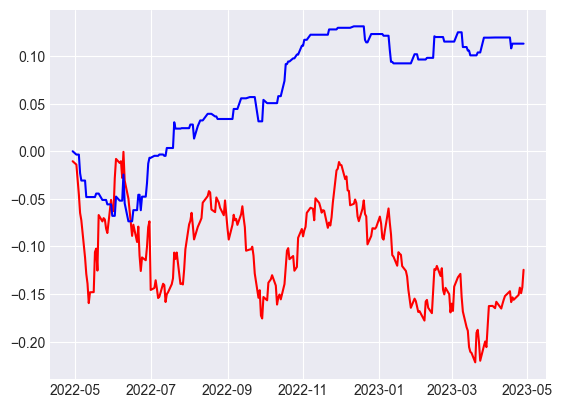

In [9]:
df['Predicted_Signal'] = cls.predict(X)
# Calculate daily returns
df['Return'] = df.Close.pct_change()
# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)
# Calculate Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()
# Plot Strategy Cumulative returns
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')

In [13]:
rfc = RandomForestClassifier().fit(X_train, y_train)


In [14]:
Y_pred = rfc.predict(X_test)
score = accuracy_score(y_test, Y_pred)  
score

0.5

In [ ]:
df = pd.read_csv('nestle_dataset.csv')
# Changes The Date column as index columns
df.index = pd.to_datetime(df['Date'])

# drop The original date column
df = df.drop(['Date'], axis='columns')


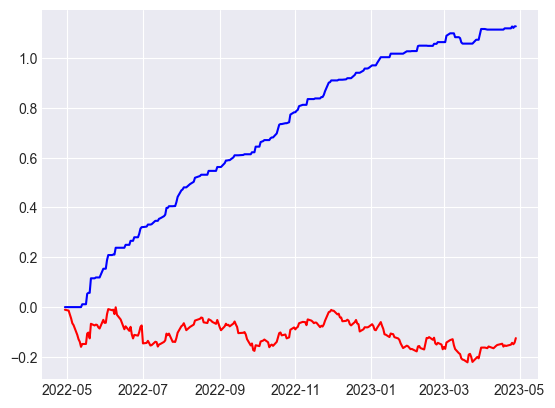

In [17]:
df['Predicted_Signal'] = rfc.predict(X)
# Calculate daily returns
df['Return'] = df.Close.pct_change()
# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)
# Calculate Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()
# Plot Strategy Cumulative returns
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')